# Unit 5 - Financial Planning

In [20]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [21]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [22]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [23]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [24]:
# Fetch current BTC price

btc_data = requests.get(btc_url)
btc_json = btc_data.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']



# Fetch current ETH price

eth_data = requests.get(eth_url)
eth_json = eth_data.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current price of 1 btc in USD is ${btc_price:0.2f}")
print(f"The current price of 1 eth in USD is ${eth_price:0.2f}")
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current price of 1 btc in USD is $39147.00
The current price of 1 eth in USD is $2876.32
The current value of your 1.2 BTC is $46976.40
The current value of your 5.3 ETH is $15244.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [25]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [26]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [27]:
# Format current date as ISO format

start = pd.Timestamp("2018-04-09", tz="America/New_York").isoformat()
end   = pd.Timestamp("2022-04-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Preview DataFrame
portfolio_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-04-09 04:00:00+00:00,106.83,107.0000,106.78,107.00,3746468,14462,106.889641,AGG
2018-04-10 04:00:00+00:00,106.95,106.9850,106.83,106.92,2955565,12688,106.897189,AGG
2018-04-11 04:00:00+00:00,107.05,107.0599,106.93,107.01,8598940,21146,106.995149,AGG
2018-04-12 04:00:00+00:00,106.91,106.9300,106.76,106.77,3899002,13576,106.806356,AGG
2018-04-13 04:00:00+00:00,106.69,106.8400,106.67,106.80,2764839,11536,106.786953,AGG
...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,453.20,456.9100,452.26,456.80,59663209,503316,455.309774,SPY
2022-04-05 04:00:00+00:00,455.23,457.8300,449.82,451.03,74022189,644313,453.412462,SPY
2022-04-06 04:00:00+00:00,446.87,448.9300,443.47,446.52,105592595,901634,446.345270,SPY


In [28]:
# Separate ticker data
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_combined = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio_combined

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2018-04-09 04:00:00+00:00  106.83  107.0000  106.780  107.00   3746468   
2018-04-10 04:00:00+00:00  106.95  106.9850  106.830  106.92   2955565   
2018-04-11 04:00:00+00:00  107.05  107.0599  106.930  107.01   8598940   
2018-04-12 04:00:00+00:00  106.91  106.9300  106.760  106.77   3899002   
2018-04-13 04:00:00+00:00  106.69  106.8400  106.670  106.80   2764839   
...                           ...       ...      ...     ...       ...   
2022-04-04 04:00:00+00:00  106.87  106.8700  106.560  106.84   9956493   
2022-04-05 04:00:00+00:00  106.60  106.6250  105.740  105.76  11018430   
2022-04-06 04:00:00+00:00  105.20  105.8050  105.115  105.49  13322630   
2022-04-07 04:00:00+00:00  105.38  105.5100  105.130  105.26   7921117   
2022-04-08 04:00:00+00:00  104.82  105.0100  104.615  104.73   6501822   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-04-09 04:00:00+00:00       14462  106.889641  261.37  264.84  259.9356   
2018-04-10 04:00:00+00:00       12688  106.897189  264.25  266.04  262.9800   
2018-04-11 04:00:00+00:00       21146  106.995149  263.42  265.64  263.3900   
2018-04-12 04:00:00+00:00       13576  106.806356  265.28  267.00  265.0600   
2018-04-13 04:00:00+00:00       11536  106.786953  267.45  267.54  264.0100   
...                               ...         ...     ...     ...       ...   
2022-04-04 04:00:00+00:00       32544  106.739298  453.20  456.91  452.2600   
2022-04-05 04:00:00+00:00       34684  105.931526  455.23  457.83  449.8200   
2022-04-06 04:00:00+00:00       47090  105.463015  446.87  448.93  443.4700   
2022-04-07 04:00:00+00:00       25631  105.278761  445.67  450.69  443.5300   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.63  445.9400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-04-09 04:00:00+00:00  261.00  105506132      333763  262.165085  
2018-04-10 04:00:00+00:00  265.15  106004436      405039  264.523095  
2018-04-11 04:00:00+00:00  263.76   91886993      329135  264.275035  
2018-04-12 04:00:00+00:00  265.93   69002592      282541  266.017978  
2018-04-13 04:00:00+00:00  265.15   86127234      311313  265.541433  
...                           ...        ...         ...         ...  
2022-04-04 04:00:00+00:00  456.80   59663209      503316  455.309774  
2022-04-05 04:00:00+00:00  451.03   74022189      644313  453.412462  
2022-04-06 04:00:00+00:00  446.52  105592595      901634  446.345270  
2022-04-07 04:00:00+00:00  448.77   77538519      628673  447.098209  
2022-04-08 04:00:00+00:00  447.57   79148376      573491  448.250805  

[1010 rows x 14 columns]

In [29]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AGG"] = df_portfolio_combined["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_combined["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices

,AGG,SPY
2018-04-09,107.00,261.00
2018-04-10,106.92,265.15
2018-04-11,107.01,263.76
2018-04-12,106.77,265.93
2018-04-13,106.80,265.15
...,...,...
2022-04-04,106.84,456.80
2022-04-05,105.76,451.03
2022-04-06,105.49,446.52
2022-04-07,105.26,448.77


In [30]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices['AGG'].iloc[-1]
spy_close_price = df_closing_prices['SPY'].iloc[-1]



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.73
Current SPY closing price: $447.57


In [31]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22378.50
The current value of your 200 AGG shares is $20946.00


### Savings Health Analysis

In [32]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
savings = {'amount': [crypto, shares]}

df_savings = pd.DataFrame(savings)

df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
#display(df_savings)
df_savings

,amount
crypto,62220.896
shares,43324.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

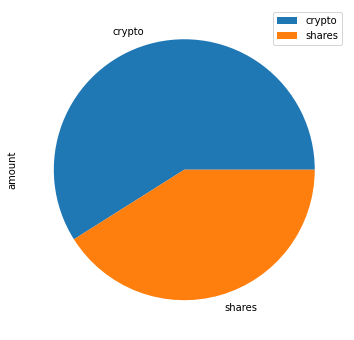

In [33]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True, figsize=(11, 6))

In [34]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares

# Validate saving health
# YOUR CODE HERE!
if total_savings < emergency_fund:
    print('Unfortunately you do not have enough in your emergency fund.')
elif total_savings > emergency_fund:
    print('Well done! You have enough money in your emergency fund.')
else:
    print('You have hit your savings goal for your emergency fund!')

Well done! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-26', tz='America/New_York').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-04-09 04:00:00+00:00,106.83,107.0000,106.78,107.00,3746468,14462,106.889641,AGG
2018-04-10 04:00:00+00:00,106.95,106.9850,106.83,106.92,2955565,12688,106.897189,AGG
2018-04-11 04:00:00+00:00,107.05,107.0599,106.93,107.01,8598940,21146,106.995149,AGG
2018-04-12 04:00:00+00:00,106.91,106.9300,106.76,106.77,3899002,13576,106.806356,AGG
2018-04-13 04:00:00+00:00,106.69,106.8400,106.67,106.80,2764839,11536,106.786953,AGG


In [37]:
# Reorganize the DataFrame
# Separate ticker data
spy_stock = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
agg_bond = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([spy_stock, agg_bond], axis=1, keys=["SPY","AGG"])

# Display sample data
df_portfolio.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2018-04-09 04:00:00+00:00  261.37  264.84  259.9356  261.00  105506132   
2018-04-10 04:00:00+00:00  264.25  266.04  262.9800  265.15  106004436   
2018-04-11 04:00:00+00:00  263.42  265.64  263.3900  263.76   91886993   
2018-04-12 04:00:00+00:00  265.28  267.00  265.0600  265.93   69002592   
2018-04-13 04:00:00+00:00  267.45  267.54  264.0100  265.15   86127234   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2018-04-09 04:00:00+00:00      333763  262.165085  106.83  107.0000  106.78   
2018-04-10 04:00:00+00:00      405039  264.523095  106.95  106.9850  106.83   
2018-04-11 04:00:00+00:00      329135  264.275035  107.05  107.0599  106.93   
2018-04-12 04:00:00+00:00      282541  266.017978  106.91  106.9300  106.76   
2018-04-13 04:00:00+00:00      311313  265.541433  106.69  106.8400  106.67   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2018-04-09 04:00:00+00:00  107.00  3746468       14462  106.889641  
2018-04-10 04:00:00+00:00  106.92  2955565       12688  106.897189  
2018-04-11 04:00:00+00:00  107.01  8598940       21146  106.995149  
2018-04-12 04:00:00+00:00  106.77  3899002       13576  106.806356  
2018-04-13 04:00:00+00:00  106.80  2764839       11536  106.786953

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_simulation = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.4,.60],
    num_simulation = 1000,
    num_trading_days = 252 * 30
)

In [39]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_simulation.portfolio_data.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2018-04-09 04:00:00+00:00  261.37  264.84  259.9356  261.00  105506132   
2018-04-10 04:00:00+00:00  264.25  266.04  262.9800  265.15  106004436   
2018-04-11 04:00:00+00:00  263.42  265.64  263.3900  263.76   91886993   
2018-04-12 04:00:00+00:00  265.28  267.00  265.0600  265.93   69002592   
2018-04-13 04:00:00+00:00  267.45  267.54  264.0100  265.15   86127234   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-04-09 04:00:00+00:00      333763  262.165085          NaN  106.83   
2018-04-10 04:00:00+00:00      405039  264.523095     0.015900  106.95   
2018-04-11 04:00:00+00:00      329135  264.275035    -0.005242  107.05   
2018-04-12 04:00:00+00:00      282541  266.017978     0.008227  106.91   
2018-04-13 04:00:00+00:00      311313  265.541433    -0.002933  106.69   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2018-04-09 04:00:00+00:00  107.0000  106.78  107.00  3746468       14462   
2018-04-10 04:00:00+00:00  106.9850  106.83  106.92  2955565       12688   
2018-04-11 04:00:00+00:00  107.0599  106.93  107.01  8598940       21146   
2018-04-12 04:00:00+00:00  106.9300  106.76  106.77  3899002       13576   
2018-04-13 04:00:00+00:00  106.8400  106.67  106.80  2764839       11536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-04-09 04:00:00+00:00  106.889641          NaN  
2018-04-10 04:00:00+00:00  106.897189    -0.000748  
2018-04-11 04:00:00+00:00  106.995149     0.000842  
2018-04-12 04:00:00+00:00  106.806356    -0.002243  
2018-04-13 04:00:00+00:00  106.786953     0.000281

In [41]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 110.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 120.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 130.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 140.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 150.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 160.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 170.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 180.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 190.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 200.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 210.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 220.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 230.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 240.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 250.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 260.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 270.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 280.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 290.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 300.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 310.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 320.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 330.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 340.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 350.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 360.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 370.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 380.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 390.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 400.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 410.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 420.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 430.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 440.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 450.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 460.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 470.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 480.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 490.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 500.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 510.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 520.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 530.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 540.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 550.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 560.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 570.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 580.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 590.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 600.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 610.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 620.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 630.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 640.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 650.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 660.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 670.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 680.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 690.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 700.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 710.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 720.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 730.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 740.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 750.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 760.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 770.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 780.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 790.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 800.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 810.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 820.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 830.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 840.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 850.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 860.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 870.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 880.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 890.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 900.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 910.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 920.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 930.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 940.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 950.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 960.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 970.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 980.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

Running Monte Carlo simulation number 990.


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod(

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004948,0.989890,1.010148,0.988237,1.002226,0.998324,1.003190,1.001014,0.990887,1.011140,...,0.990922,0.995589,0.995294,1.000269,1.006954,0.995938,1.003446,0.993757,1.009772,1.004292
2,1.012729,0.996918,1.013137,0.989643,0.996517,1.005245,1.007385,1.014706,0.974788,1.015398,...,0.993315,0.990695,1.003257,1.000827,1.000826,0.999418,0.998623,1.002097,1.011933,1.012854
3,1.005545,1.003189,0.997549,0.991932,1.001840,1.007861,1.012739,1.017499,0.973133,1.012046,...,0.987091,0.991463,0.997673,0.989743,1.007901,1.000683,0.995331,1.003505,1.013423,1.018183
4,1.002528,0.997257,0.993712,0.991511,1.007220,1.002802,1.017236,1.012611,0.979851,1.010346,...,0.985260,0.989842,1.003945,0.991823,1.010868,0.989893,0.994804,1.000000,1.008217,1.015804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.936277,5.800019,2.743339,5.896576,7.170294,6.056277,4.582493,5.290794,10.478183,5.293857,...,6.166875,2.940398,5.428422,4.137201,5.865227,4.980082,8.346943,6.836108,5.958788,5.268772
7557,10.942014,5.831208,2.762979,5.891049,7.180581,6.054810,4.541221,5.295545,10.635778,5.308932,...,6.196295,2.926707,5.468174,4.167997,5.866907,4.920245,8.374465,6.959873,6.017065,5.265111
7558,10.909048,5.789227,2.766988,5.875732,7.189576,6.051281,4.564009,5.288032,10.616686,5.336634,...,6.212889,2.911804,5.472076,4.169735,5.856328,4.874855,8.382204,6.963083,6.075693,5.281916
7559,11.016734,5.844926,2.785419,5.889043,7.220296,6.019922,4.549738,5.268411,10.630368,5.353956,...,6.229998,2.928074,5.431865,4.180944,5.885185,4.859957,8.355328,6.966857,6.122493,5.270782


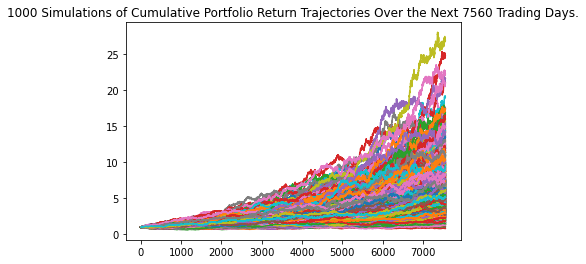

In [42]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_simulation.plot_simulation()

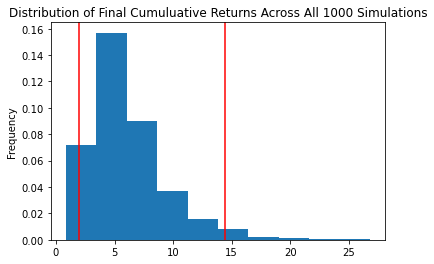

In [43]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
even_table = mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(even_table)


count           1000.000000
mean               6.066068
std                3.257939
min                0.831683
25%                3.830836
50%                5.386935
75%                7.336959
max               26.822338
95% CI Lower       1.952753
95% CI Upper      14.443494
Name: 7560, dtype: float64


C:\Users\pnyam\OneDrive\Documents\FinTech Bootcamp\UTOR-VIRT-FIN-PT-02-2022-U-LOL-main\Homeworks\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [45]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_table[8]*initial_investment,2)
ci_upper = round(even_table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39055.06 and $288869.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_table[8]*initial_investment,2)
ci_upper = round(even_table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $58582.58 and $433304.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")